In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('spam.csv', encoding_errors= 'replace')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
459,ham,Going thru a very different feeling.wavering d...,NaN,NaN,NaN
5450,ham,Sac needs to carry on:),NaN,NaN,NaN
2204,ham,Raji..pls do me a favour. Pls convey my Birthd...,NaN,NaN,NaN
238,ham,"New Theory: Argument wins d SITUATION, but los...",NaN,NaN,NaN
5240,ham,"Gud gud..k, chikku tke care.. sleep well gud nyt",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

1.Data Cleaning
2.EDA
3.Text Preprocessing
4.Model Building
5.Evaluation

In [ ]:
#Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True, errors = "ignore")
df.sample(5)

,v1,v2
2511,ham,Er yep sure. Props?
3917,ham,No need to ke qi... �� too bored izzit y sudde...
979,ham,Another month. I need chocolate weed and alcohol.
5311,ham,K.k:)i'm going to tirunelvali this week to see...
3397,ham,It only does simple arithmetic not percentages.


In [ ]:
#renaming the cols because confusing
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Lsbel vs one hot encoding:
Label Encoding: Assign each categorical value an integer value based on alphabetical order.
Each “A” value has been converted to 0.
Each “B” value has been converted to 1.
Each “C” value has been converted to 2.

One Hot Encoding: Create new variables that take on values 0 and 1 to represent the original categorical values.
The value in the new Team_A column is 1 if the original value in the Team column was A. Otherwise, the value is 0.
The value in the new Team_B column is 1 if the original value in the Team column was B. Otherwise, the value is 0.
The value in the new Team_C column is 1 if the original value in the Team column was C. Otherwise, the value is 0.


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#check for duplicate values
df.duplicated().sum()

403

keep='first': This parameter specifies which duplicate rows to keep. In this case, 'first' means to keep the first occurrence of a duplicate row and remove subsequent duplicates.

In [ ]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [ ]:
#EDA
#how many % are spam
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

Matplotlib:

Line Plot
Scatter Plot
Bar Chart:
Histogram:
Displays the distribution of a single continuous variable by dividing it into bins and counting the frequency of values in each bin.
Box Plot:
Summarizes the distribution of a continuous variable by showing the median, quartiles, and potential outliers.

Seaborn:

Scatter Plot:
Similar to Matplotlib, Seaborn's scatter plot can be used to visualize relationships between two continuous variables, with added functionality for including a third variable as the color or size of points.

Pair Plot:

Box Plot:
Seaborn provides an enhanced version of the box plot with options for grouping by categorical variables and adding additional visual elements like swarm plots.

Violin Plot:
Similar to a box plot but also displays the probability density of the data at different values.

Heatmap:
Visualizes the correlation matrix of variables

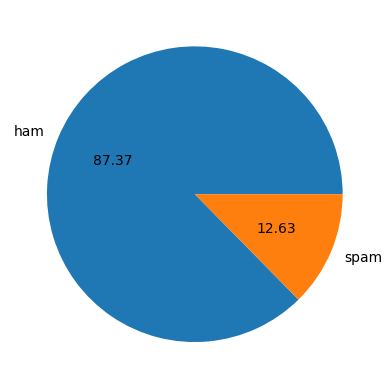

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

Data is imbalanced too much ham and too less spam

In [ ]:
import nltk #natural language toolkit

Analyse how many sentences and words and alphabets are used in our messages

In [ ]:
nltk.download('punkt') #for downloading dependencies
#c1 = number of characters
#c2 = number of words
#c3 = number of sentences using nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_char'] = df['text'].apply(len)
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#using nltk finding num of words
#using lambda function we will break the sms on the basis of words.
#count the length of list of words after tokenizing them
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


sent_tokenize will tokenize based on sentences

In [ ]:
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456761,1.966531
std,58.174846,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123782,1.820195
std,56.356802,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


describe function output for ham messages as ham = 0 and spam = 1
mean of spam = 137 character whereas ham has mean of 70 meaning on avg a message contains 70 characters for ham and 137 characters for spam

In [ ]:
df[df['target'] == 1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

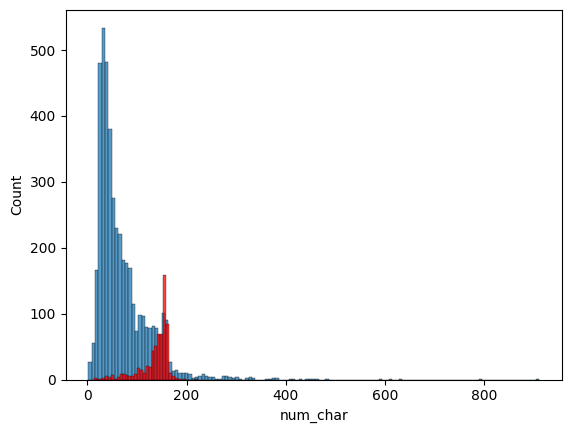

In [ ]:
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'], color='red')

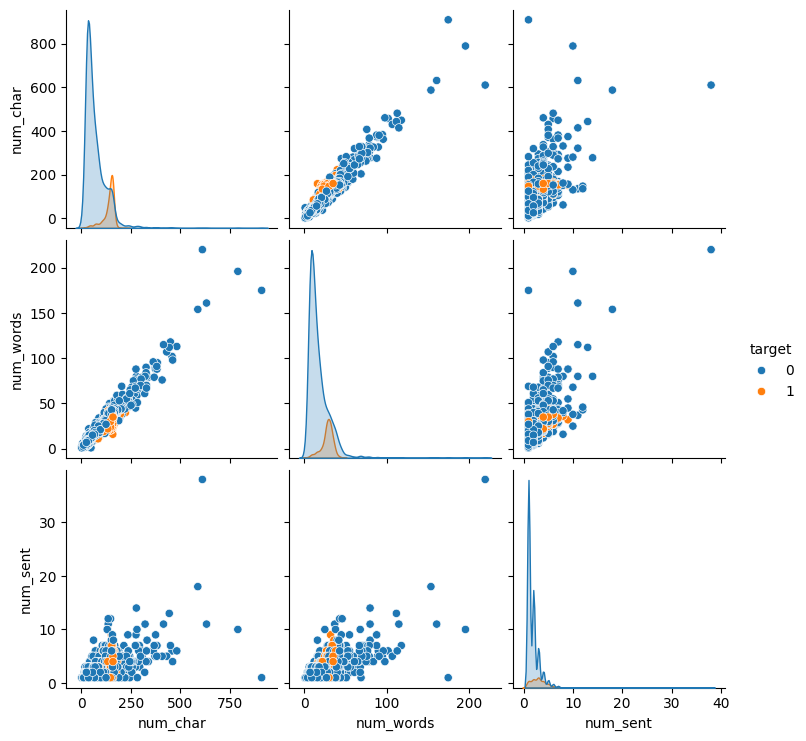

In [ ]:
sns.pairplot(df,hue='target')

<ipython-input-53-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

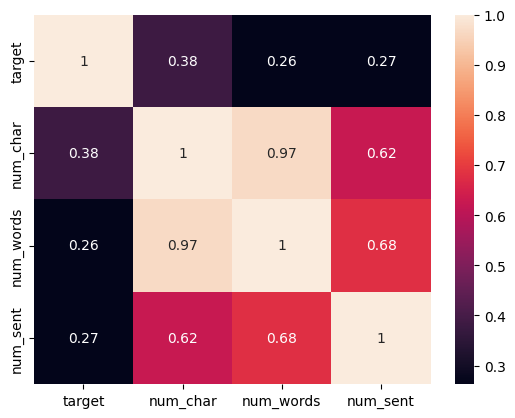

In [ ]:
sns.heatmap(df.corr(),annot=True)

3. Data Preprocessing
-lower case
-tokenization
-removing special characters
-removing stop words and punctuation(is, of, the)
-stemming(dance, dancing and dances all coverted to root meaning word = dance)

In [ ]:
#stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

#punctuation marks
import string
string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  #now text is converted into a list
  y = []
  for i in text:
    if i.isalnum(): #is alphanumeric to remove special characters
      y.append(i)

  text = y[:] #clonig list to text
  #if you write text = y then the code will not give any output
  #as it is the wrong way to clone list as it is a mutable datatype
  #and text along with y will also get cleared
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  #stemming
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return  " ".join(y)

In [ ]:
transform_text('Hi How %% aRe Sakshi yoU? I am lIking LeARnIng!')

'hi sakshi like learn'

In [ ]:
#transforming text in the dataset
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Creating a wordcloud which will highlight the important words in ham and spam as we will make the wordcloud for both

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
#str.cat(sep=" ") -> concatenating string on top of space

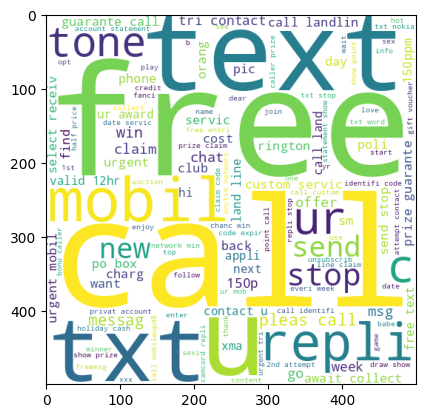

In [ ]:
plt.imshow(spam_wc)

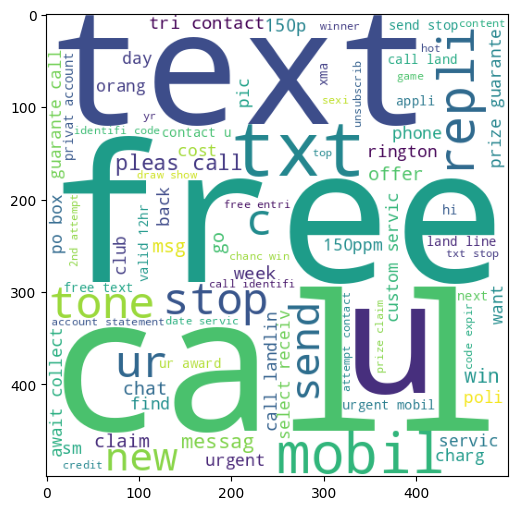

In [ ]:
plt.figure(figsize=(12,6)) #adjusting figure size
plt.imshow(spam_wc)

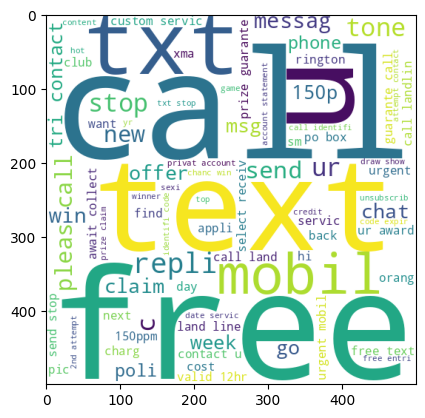

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [ ]:
#finding top 30 words
df.head()
#corpus = large and structured collection of text_data
spam_corpus = []
for message in df[df['target']==1]['transformed_text'].tolist(): #to get a big list where every
#message is one element in the list
  for word in message.split():
    spam_corpus.append(word)

In [ ]:
from collections import Counter
c = Counter(spam_corpus)
#it will create a dictionary with the word count of each word as a key value pair
most_c  = c.most_common(30) #most used 30 words

In [ ]:
#adding it to a dataframe
dfn = pd.DataFrame(most_c)
#we will plot a barplot and get 0 and 1 from the dataframe
dfn.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


<ipython-input-105-a3c1b386e37b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = dfn.columns[0], y = dfn.columns[1], data=dfn, palette="rainbow")


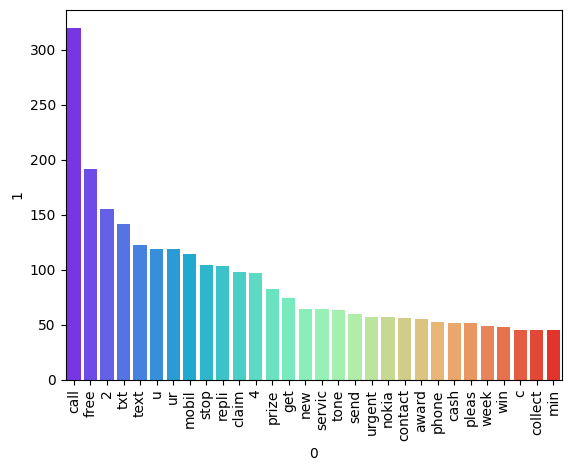

In [ ]:
#sns.barplot(dfn[0], dfn[1])
sns.barplot(x = dfn.columns[0], y = dfn.columns[1], data=dfn, palette="rainbow")
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-106-9ba0994de8b1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = dfs.columns[0], y = dfs.columns[1], data=dfs, palette="rainbow")


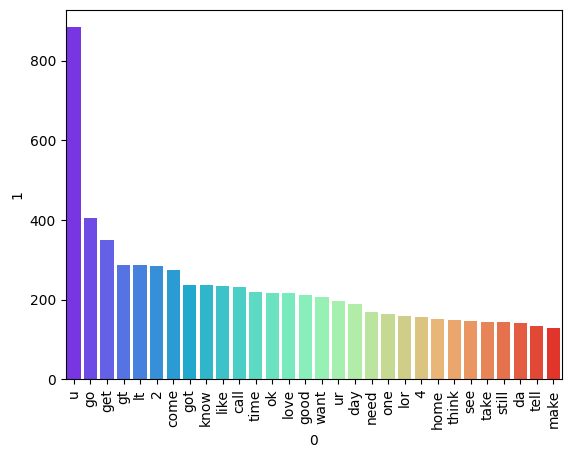

In [ ]:
ham_corpus = []
for message in df[df['target']==0]['transformed_text'].tolist():
  for word in message.split():
    ham_corpus.append(word)
from collections import Counter
h = Counter(ham_corpus)
most_h  = h.most_common(30)
dfs = pd.DataFrame(most_h)
sns.barplot(x = dfs.columns[0], y = dfs.columns[1], data=dfs, palette="rainbow")
plt.xticks(rotation='vertical')
plt.show()

There is a consensus that naive bayes works best on text data

- any model requires numerical input and gives output
- our input is transformed_text != numerical input
- convert text to numbers also called vectors
- vectorise the text, 3 methods:
1. Bag of words
- Make a column of frequent of words and then in every sms check how many times that word is coming
2. tfidf
3.word2vec

- Vectorise then give as input to naive bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(df['transformed_text']).toarray()
#sparse to dense array?
X.shape

(5169, 6677)

In [ ]:
y = df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)